In [130]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [170]:
current_dir = os.getcwd() 
relative_path = os.path.join('..', '..','data', 'train.csv')
train_data = pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..', '..','data', 'test.csv')
test_data = pd.read_csv(os.path.join(current_dir, relative_path))
relative_path = os.path.join('..', '..','data', 'dataset.csv')
data = pd.read_csv(os.path.join(current_dir, relative_path))

In [171]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


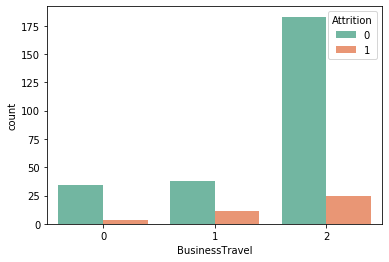

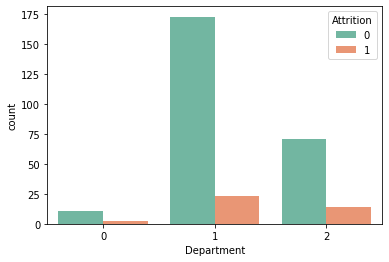

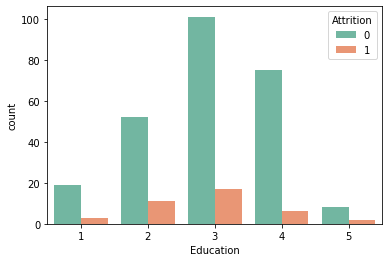

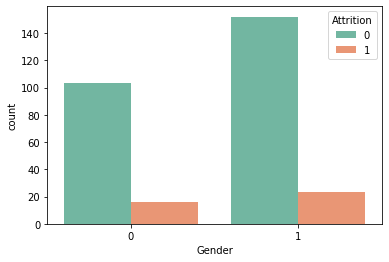

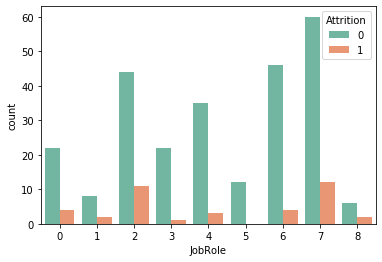

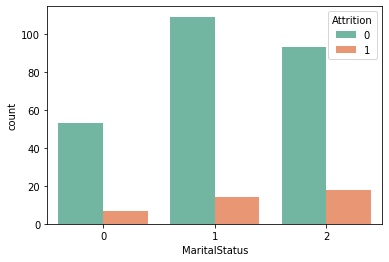

In [179]:
# Check data types of all columns in train_data
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'Gender', 'JobRole', 'MaritalStatus']
for col in categorical_cols:
    train_data[col] = train_data[col].astype('category')

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=train_data, hue='Attrition', palette='Set2')
    plt.show()

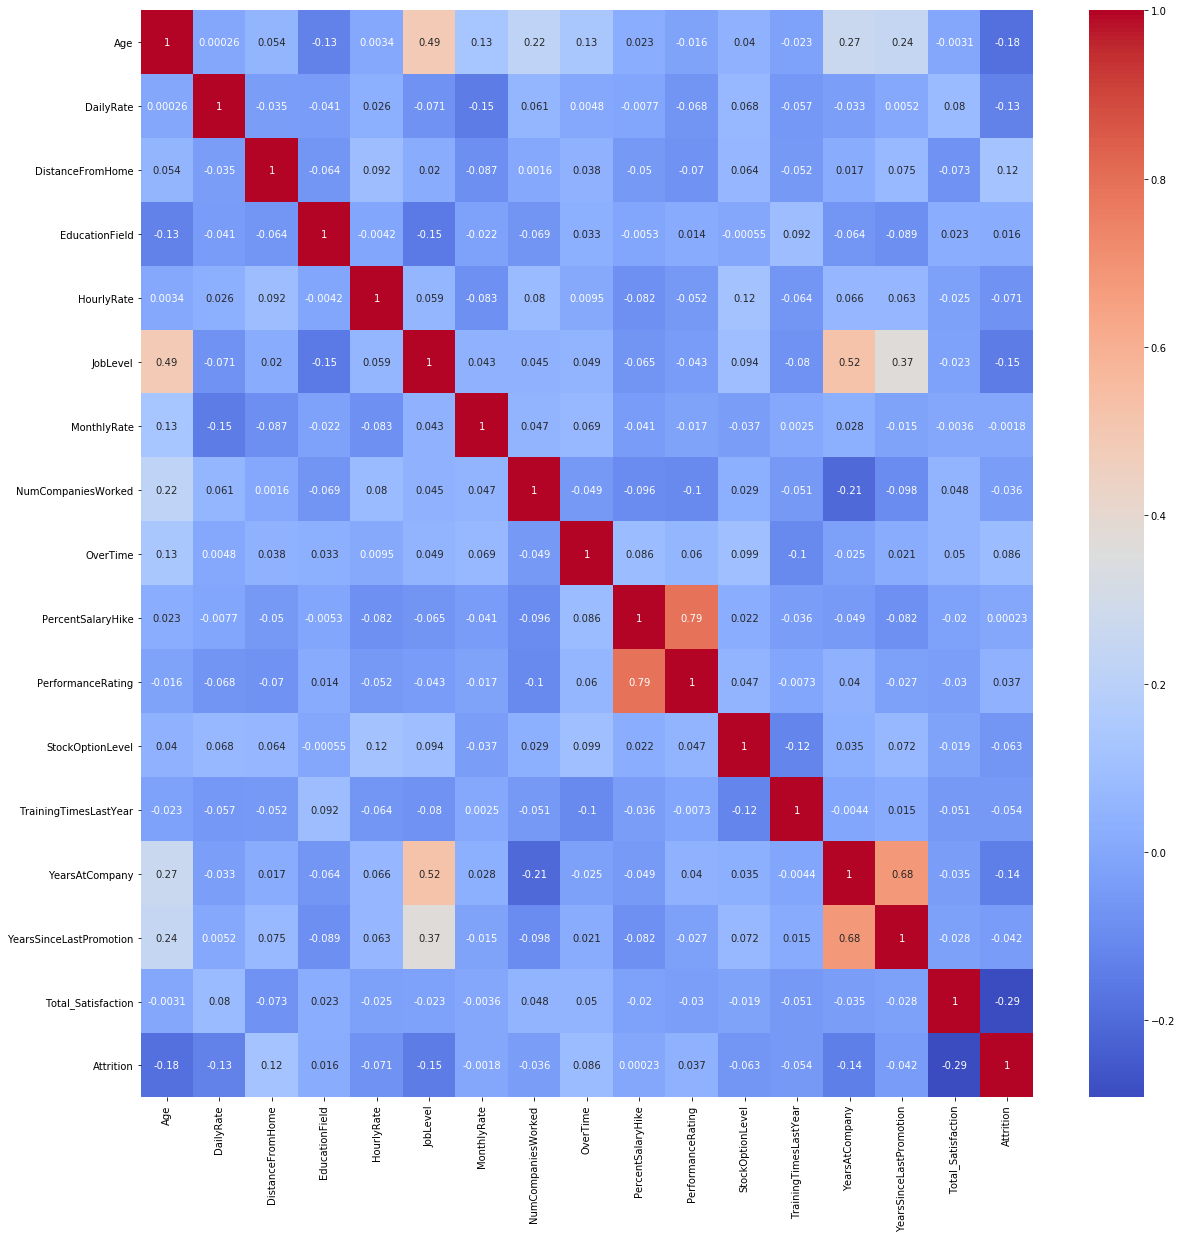

No strong correlations with Attrition


In [180]:
## correlation matrix
corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
print("No strong correlations with Attrition")

In [207]:
x_train = train_data.drop(["Attrition"], axis = 1)
x_train = pd.get_dummies(x_train, drop_first=True)    # Handling missing values
y_train = train_data["Attrition"]

x_test = test_data.drop(["Attrition"], axis = 1)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = test_data["Attrition"]

x = data.drop(["Attrition"], axis = 1)
y = data["Attrition"]
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
#y_train

In [150]:
X_mean = x_train.mean(axis=0)
X_std = x_train.std(axis=0)
X_train = (x_train - X_mean)/(1e-8 + X_std)
X_test = (x_train - X_mean)/(1e-8 + X_std)

In [182]:
%%time
# We use time to compute the training time of our model
model = LogisticRegression().fit(X_train, y_train)

Wall time: 25.9 ms


In [183]:

y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) }")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) }")
#f1 = f1_score(y_test, y_test_predict)*100
y_test_arr= np.array(y_test)
y_test_predict_arr = np.array(y_test_predict)
# Calculate Macro F1 Score: Takes the F1 scores of each class and averages them, treating all classes equally.
macro_f1 = f1_score(y_test_arr, y_test_predict_arr, average='macro')
#print(f"Macro F1 Score: {macro_f1}")

# Calculate Micro F1 Score: Aggregates the total number of false positives, false negatives, and true positives over all classes, and then the F1 score is calculated
micro_f1 = f1_score(y_test_arr, y_test_predict_arr, average='micro')
#print(f"Micro F1 Score: {micro_f1}")

# Calculate Weighted F1 Score: Computes the average F1 Score, weighted by the support (the number of true instances for each label)
weighted_f1 = f1_score(y_test_arr, y_test_predict_arr, average='weighted')
print(f"Weighted F1 Score: {weighted_f1}")
print(classification_report(y_test, y_test_predict_arr))
#print("f1 score ",f1)

Training Accurracy: 0.8979591836734694
Testing Accurracy: 0.8979591836734694
Weighted F1 Score: 0.8775764987642996
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.80      0.31      0.44        39

    accuracy                           0.90       294
   macro avg       0.85      0.65      0.69       294
weighted avg       0.89      0.90      0.88       294



In [ ]:
# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [169]:
'''
C parameter: The inverse of the regularization strength. Smaller values of C specify stronger regularization. The default value is 1.0.
solver parameter:used for optimization. This can be 'newton-cg', 'lbfgs', 'liblinear', 'sag', or 'saga'. The default value is 'lbfgs'
penalty parameter: can be 'l1', 'l2', 'elasticnet', or 'none'. The default value is 'l2'
'''
# Disable warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Define hyperparameters to tune for each parameter grid
    param_grids = [
        {
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'C': [0.001, 0.01, 0.1, 1, 10]
        },
        {
            'penalty': ['none', 'l2'],
            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'C': [0.001, 0.01, 0.1, 1, 10]
        }
    ]

    best_accuracy = 0
    best_classification_report = ""
    best_parameters = {}

    # Perform grid search for each parameter grid
    for param_grid in param_grids:
        grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        # Print all classification reports for each combination of hyperparameters
        cv_results = grid_search.cv_results_
        for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
            #print("Mean accuracy:", mean_score)
            print("Hyperparameters:", params)
            logistic_regression = LogisticRegression(**params)
            logistic_regression.fit(X_train_scaled, y_train)
            y_pred = logistic_regression.predict(X_test_scaled)
            report = classification_report(y_test, y_pred)
            acc= accuracy_score(y_train, y_pred)
            print("accuracy: ",acc)
            print("Classification report:")
            print(report)

            # Check if this model has the best accuracy so far
            if acc > best_accuracy:
                best_accuracy = acc
                best_classification_report = report
                best_parameters = params

    # Print the best classification report and corresponding best parameters
    print("Best Classification Report:")
    print(best_classification_report)
    print("Best Parameters:", best_parameters)


Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy:  0.8673469387755102
Classification report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy:  0.891156462585034
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       255
           1       0.77      0.26      0.38        39

    accuracy                           0.89       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294

Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy:  0.8673469387755102
Cl

In [202]:
C_values = [0.001, 0.01, 0.1, 1, 10,100]
for i,c in enumerate(C_values):
    print(f"Training Logistic Regression Classifier with {c} Regularization strength")
    model = LogisticRegression( C=c ).fit(X_train_scaled, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train_scaled)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test_scaled)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")
    print("_____________________________________")


Training Logistic Regression Classifier with 0.001 Regularization strength
Training Accurracy: 86.73469387755102%
Testing Accurracy: 86.73469387755102%
_____________________________________
Training Logistic Regression Classifier with 0.01 Regularization strength
Training Accurracy: 86.73469387755102%
Testing Accurracy: 86.73469387755102%
_____________________________________
Training Logistic Regression Classifier with 0.1 Regularization strength
Training Accurracy: 88.09523809523809%
Testing Accurracy: 88.09523809523809%
_____________________________________
Training Logistic Regression Classifier with 1 Regularization strength
Training Accurracy: 89.45578231292517%
Testing Accurracy: 89.45578231292517%
_____________________________________
Training Logistic Regression Classifier with 10 Regularization strength
Training Accurracy: 89.1156462585034%
Testing Accurracy: 89.1156462585034%
_____________________________________
Training Logistic Regression Classifier with 100 Regularizatio

In [204]:
warnings.filterwarnings("ignore")
penalty_values = ['l1', 'l2','none']
for i,p in enumerate(penalty_values):
    print(f"Training Logistic Regression Classifier with {p} penalty")
    model = LogisticRegression( penalty=p,solver='saga' ).fit(X_train_scaled, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train_scaled)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test_scaled)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")
    print("_____________________________________")

Training Logistic Regression Classifier with l1 penalty
Training Accurracy: 89.45578231292517%
Testing Accurracy: 89.45578231292517%
_____________________________________
Training Logistic Regression Classifier with l2 penalty
Training Accurracy: 89.79591836734694%
Testing Accurracy: 89.79591836734694%
_____________________________________
Training Logistic Regression Classifier with none penalty
Training Accurracy: 89.1156462585034%
Testing Accurracy: 89.1156462585034%
_____________________________________


In [203]:
warnings.filterwarnings("ignore")
solver_list = ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']
for i,s in enumerate(solver_list):
    print(f"Training Logistic Regression Classifier with {s} solver ")
    model = LogisticRegression(solver=s ).fit(X_train_scaled, y_train)

    # Predicting the Test set results
    y_train_predict = model.predict(X_train_scaled)
    print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
    y_test_predict = model.predict(X_test_scaled)
    print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")
    print("_____________________________________")

Training Logistic Regression Classifier with liblinear solver 
Training Accurracy: 89.79591836734694%
Testing Accurracy: 89.79591836734694%
_____________________________________
Training Logistic Regression Classifier with newton-cg solver 
Training Accurracy: 89.45578231292517%
Testing Accurracy: 89.45578231292517%
_____________________________________
Training Logistic Regression Classifier with lbfgs solver 
Training Accurracy: 89.45578231292517%
Testing Accurracy: 89.45578231292517%
_____________________________________
Training Logistic Regression Classifier with sag solver 
Training Accurracy: 89.45578231292517%
Testing Accurracy: 89.45578231292517%
_____________________________________
Training Logistic Regression Classifier with saga solver 
Training Accurracy: 89.79591836734694%
Testing Accurracy: 89.79591836734694%
_____________________________________


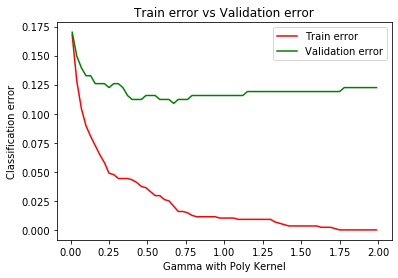

In [215]:
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
values= np.arange(0.01,0.5,0.05)
train_errors = []
valid_errors = []

C_values = np.arange(0.01,2,0.03)
for c in (C_values):
    clf = LogisticRegression( C=c ).fit(X_train_encoded, y_train)
    clf.fit(X_train_encoded, y_train)
    predictions=clf.predict(X_test_encoded)
    train_error = 1.0 - clf.score(X_train_encoded,y_train)
    valid_error = 1.0 - clf.score(X_val_encoded, y_val)
    train_errors.append(train_error)
    valid_errors.append(valid_error)

# Plot the train and validation errors vs. gamma
plt.plot(C_values, train_errors, label='Train error',color='r')
plt.plot(C_values, valid_errors, label='Validation error',color='g')
plt.xlabel('C_Values')
plt.ylabel('Classification error')
plt.title('Train error vs Validation error')
plt.legend()
plt.show()


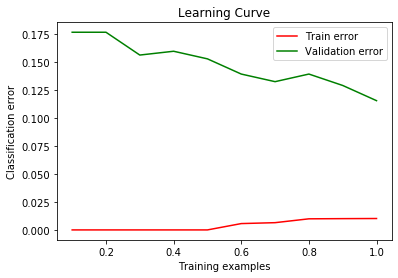

In [216]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x, y, and encoder are defined

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

train_errors = []
val_errors = []
train_sizes = np.linspace(0.1, 1.0, 10)  # Adjust the range of training sizes as needed

for train_size in train_sizes:
    # Select a subset of the training data
    n_samples = int(len(X_train_encoded) * train_size)
    X_train_subset = X_train_encoded[:n_samples]
    y_train_subset = y_train[:n_samples]
    
    # Train the model
    clf = LogisticRegression(C=1.0)  # Adjust hyperparameters as needed
    clf.fit(X_train_subset, y_train_subset)
    
    # Predictions and error calculation
    y_train_pred = clf.predict(X_train_subset)
    train_error = 1.0 - accuracy_score(y_train_subset, y_train_pred)
    train_errors.append(train_error)
    
    y_val_pred = clf.predict(X_val_encoded)
    val_error = 1.0 - accuracy_score(y_val, y_val_pred)
    val_errors.append(val_error)

# Plot the learning curve
plt.plot(train_sizes, train_errors, label='Train error', color='r')
plt.plot(train_sizes, val_errors, label='Validation error', color='g')
plt.xlabel('Training examples')
plt.ylabel('Classification error')
plt.title('Learning Curve')
plt.legend()
plt.show()
